In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt
LABELS = ["Legal", "Fraud"]

In [82]:
data=pd.read_csv('/content/creditcard.csv')

In [83]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [84]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
75352,56019,-0.330203,1.265306,0.703968,0.943073,0.020692,-0.334221,0.406527,0.313829,-0.924290,...,0.222834,0.653481,-0.024697,0.123168,-0.154517,-0.303343,-0.020581,-0.017914,17.45,0.0
75353,56020,-0.824159,0.689632,0.238364,0.843827,-1.723679,2.003802,3.194546,-0.727345,-0.680086,...,-0.092779,0.491220,-0.376126,-0.768536,-0.152191,-0.255962,0.014022,-0.227837,570.00,0.0
75354,56020,0.929735,-0.299633,0.394750,0.540756,0.272645,1.656454,-0.410577,0.600046,0.184701,...,-0.038120,0.102605,0.094452,-0.985089,0.094890,0.376660,0.038140,-0.005591,44.43,0.0
75355,56021,-1.657683,-0.426294,1.687198,-1.454421,-2.383477,1.305648,0.658390,0.543973,-1.068176,...,0.166907,0.460901,-0.059376,0.079649,0.353229,-0.323458,0.023944,-0.176926,375.01,0.0
75356,56021,-1.711121,-0.369377,1.440787,0.136071,0.517265,0.196718,-0.006951,0.325528,-1.817459,...,-0.365864,-0.524456,0.085383,-0.342706,0.281718,-0.280851,NaN,NaN,NaN,NaN


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75357 entries, 0 to 75356
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    75357 non-null  int64  
 1   V1      75357 non-null  float64
 2   V2      75357 non-null  float64
 3   V3      75357 non-null  float64
 4   V4      75357 non-null  float64
 5   V5      75357 non-null  float64
 6   V6      75357 non-null  float64
 7   V7      75357 non-null  float64
 8   V8      75357 non-null  float64
 9   V9      75357 non-null  float64
 10  V10     75357 non-null  float64
 11  V11     75357 non-null  float64
 12  V12     75357 non-null  float64
 13  V13     75357 non-null  float64
 14  V14     75357 non-null  float64
 15  V15     75357 non-null  float64
 16  V16     75357 non-null  float64
 17  V17     75357 non-null  float64
 18  V18     75357 non-null  float64
 19  V19     75357 non-null  float64
 20  V20     75357 non-null  float64
 21  V21     75357 non-null  float64
 22

In [86]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Text(0, 0.5, 'Frequency')

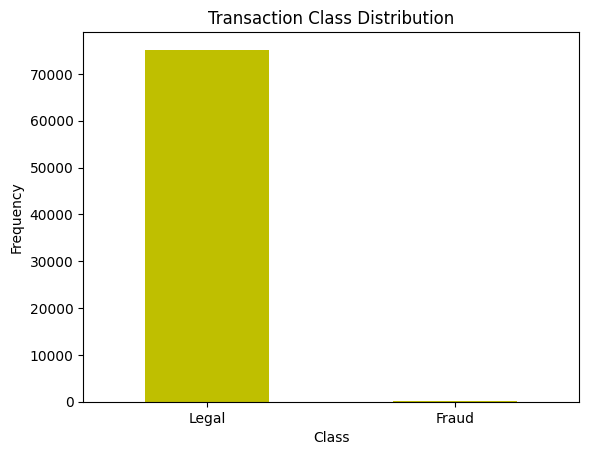

In [87]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar',color='y', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [88]:
data['Class'].value_counts()

Class
0.0    75173
1.0      183
Name: count, dtype: int64

This data is highly unbalanced.
0->normal transaction
1->fraud transaction

Seperating data for analysis

In [89]:
legal=data[data.Class==0]
fraud=data[data.Class==1]

In [90]:
print(legal.shape)
print(fraud.shape)

(75173, 31)
(183, 31)


Here we can see easily that our fraud  data is very small compared to legitimate data

In [91]:
legal.Amount.describe()

count    75173.000000
mean        97.392540
std        271.227608
min          0.000000
25%          7.690000
50%         26.760000
75%         88.960000
max      19656.530000
Name: Amount, dtype: float64

In [92]:
fraud.Amount.describe()

count     183.000000
mean       95.022350
std       216.587987
min         0.000000
25%         1.000000
50%         7.580000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

We will compare values for both transaction

In [93]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,36121.478576,-0.236877,-0.040266,0.702575,0.153816,-0.263103,0.102849,-0.097068,0.046812,0.011383,...,0.043148,-0.031060,-0.105166,-0.037869,0.007250,0.134982,0.024809,0.000981,0.003060,97.39254
1.0,31384.775956,-6.777088,4.776050,-9.019596,5.264634,-4.957996,-2.081116,-7.090161,3.259605,-3.145232,...,0.384354,0.806585,-0.183346,-0.235990,-0.080063,0.242355,0.098315,0.588353,0.048511,95.02235


Now we will do under-sampling.
We will build a sample dataset containing similar distribution of normal transaction and fraud transaction.

In [94]:
legal_sample=legal.sample(n=492)

We Shuffle the entire dataset using sample function and separate classes by filtering the dataframe.

Concatenating two dataframes

In [95]:
new_data=pd.concat([legal_sample,fraud],axis=0)

In [96]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65947,51816,0.801751,-1.062913,0.295773,0.986636,-1.077815,-0.247460,-0.067633,-0.079676,-0.725432,...,-0.307631,-0.739884,-0.138425,0.373962,0.404470,-0.354330,0.018504,0.063516,242.00,0.0
801,608,-4.130219,3.794249,-1.928831,0.048061,-2.532346,-1.469961,-1.866922,3.007835,-0.332471,...,-0.160842,-0.961563,0.383984,0.293528,0.283096,0.115836,0.011618,-0.003323,11.97,0.0
11292,19638,1.157898,-0.005051,1.247795,1.416202,-0.773002,0.260246,-0.860398,0.233600,1.974347,...,-0.015627,0.287293,-0.109857,-0.085244,0.451924,-0.272454,0.028745,0.012152,1.00,0.0
41770,40819,1.131649,0.142426,1.295638,3.046194,-0.757628,0.212861,-0.530345,0.155468,-2.169079,...,-0.521670,-1.198410,0.314685,0.262175,-0.104217,-0.252522,0.039208,0.043638,23.91,0.0
17194,28515,-0.168300,0.879467,-0.572700,-0.345212,3.136936,3.264143,0.712733,0.460367,-0.818549,...,0.044611,0.160078,-0.278971,1.013789,0.025695,-0.328249,-0.147690,-0.070130,1.49,0.0


In [97]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
73784,55279,-5.753852,0.577610,-6.312782,5.159401,-1.698320,-2.683286,-7.934389,2.373550,-3.073079,...,1.177852,0.175331,-1.211123,-0.446891,-0.405520,-0.165797,1.505516,0.359492,1.00,1.0
73857,55311,-6.159607,1.468713,-6.850888,5.174706,-2.986704,-1.795054,-6.545072,2.621236,-3.605870,...,1.061314,0.125737,0.589592,-0.568731,0.582825,-0.042583,0.951130,0.158996,0.83,1.0
74496,55614,-7.347955,2.397041,-7.572356,5.177819,-2.854838,-1.795239,-8.783235,0.437157,-3.740598,...,-0.175273,0.543325,-0.547955,-0.503722,-0.310933,-0.163986,1.197895,0.378187,0.83,1.0
74507,55618,-7.427924,2.948209,-8.678550,5.185303,-4.761090,-0.957095,-7.773380,0.717309,-3.682359,...,-0.299847,0.610479,0.789023,-0.564512,0.201196,-0.111225,1.144599,0.102280,130.44,1.0
74794,55760,-6.003422,-3.930731,-0.007045,1.714669,3.414667,-2.329583,-1.901512,-2.746111,0.887673,...,1.101671,-0.992494,-0.698259,0.139898,-0.205151,-0.472412,1.775378,-0.104285,311.91,1.0


Now we can see it clearly that both the number of fraud and legal transaction are equal


Text(0, 0.5, 'Frequency')

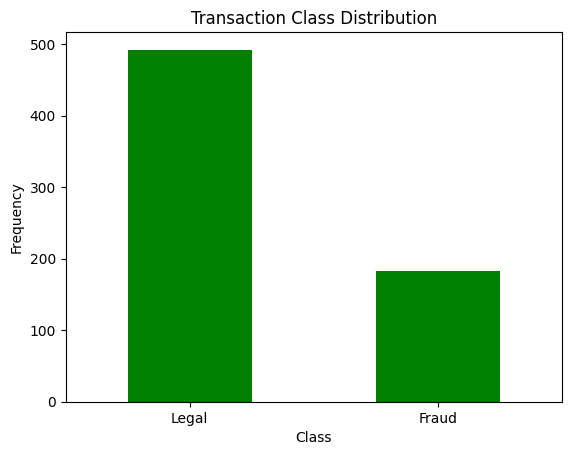

In [98]:
count_classes = pd.value_counts(new_data['Class'], sort = True)

count_classes.plot(kind = 'bar',color='g', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [99]:
new_data['Class'].value_counts()

Class
0.0    492
1.0    183
Name: count, dtype: int64

In [100]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,36311.563008,-0.414886,0.092036,0.597733,0.131076,-0.203389,0.085988,-0.081328,0.086836,0.019133,...,0.020003,-0.041961,-0.107337,-0.048279,-0.054126,0.150523,0.012055,-0.017046,-0.004422,86.79435
1.0,31384.775956,-6.777088,4.776050,-9.019596,5.264634,-4.957996,-2.081116,-7.090161,3.259605,-3.145232,...,0.384354,0.806585,-0.183346,-0.235990,-0.080063,0.242355,0.098315,0.588353,0.048511,95.02235


Splitting data into features and targets.

In [101]:
X=new_data.drop(columns='Class',axis=1)
Y=new_data['Class']

In [102]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
65947  51816  0.801751 -1.062913  0.295773  0.986636 -1.077815 -0.247460   
801      608 -4.130219  3.794249 -1.928831  0.048061 -2.532346 -1.469961   
11292  19638  1.157898 -0.005051  1.247795  1.416202 -0.773002  0.260246   
41770  40819  1.131649  0.142426  1.295638  3.046194 -0.757628  0.212861   
17194  28515 -0.168300  0.879467 -0.572700 -0.345212  3.136936  3.264143   
...      ...       ...       ...       ...       ...       ...       ...   
73784  55279 -5.753852  0.577610 -6.312782  5.159401 -1.698320 -2.683286   
73857  55311 -6.159607  1.468713 -6.850888  5.174706 -2.986704 -1.795054   
74496  55614 -7.347955  2.397041 -7.572356  5.177819 -2.854838 -1.795239   
74507  55618 -7.427924  2.948209 -8.678550  5.185303 -4.761090 -0.957095   
74794  55760 -6.003422 -3.930731 -0.007045  1.714669  3.414667 -2.329583   

             V7        V8        V9  ...       V20       V21       V22  \
65947 -0.0676

In [103]:
print(Y)

65947    0.0
801      0.0
11292    0.0
41770    0.0
17194    0.0
        ... 
73784    1.0
73857    1.0
74496    1.0
74507    1.0
74794    1.0
Name: Class, Length: 675, dtype: float64


Split the data into training set and testing set data.

In [104]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [105]:
print(X.shape,X_train.shape,X_test.shape)

(675, 30) (540, 30) (135, 30)


Model training--->>>


In [106]:
#1. Logistic Regression
model1=LogisticRegression(max_iter=100)
model1.fit(X_train,Y_train)
X_train_prediction=model1.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

print('ACCURACY ON TRAINING DATA:',training_data_accuracy)

X_test_prediction=model1.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

print('ACCURACY ON TESTING DATA:',test_data_accuracy)

ACCURACY ON TRAINING DATA: 0.9666666666666667
ACCURACY ON TESTING DATA: 0.9407407407407408


In [107]:
# 2. Decison Tree Classifier
model2=tree.DecisionTreeClassifier()
model2.fit(X_train,Y_train)

X_train_prediction=model2.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

print('ACCURACY ON TRAINING DATA:',training_data_accuracy)

X_test_prediction=model2.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

print('ACCURACY ON TESTING DATA:',test_data_accuracy)



ACCURACY ON TRAINING DATA: 1.0
ACCURACY ON TESTING DATA: 0.9259259259259259


In [108]:
#3. Random Forest
model3=RandomForestClassifier(max_depth=100)
model3.fit(X_train,Y_train)

X_train_prediction=model3.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

print('ACCURACY ON TRAINING DATA:',training_data_accuracy)

X_test_prediction=model3.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

print('ACCURACY ON TESTING DATA:',test_data_accuracy)

ACCURACY ON TRAINING DATA: 1.0
ACCURACY ON TESTING DATA: 0.9555555555555556


In [109]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

Predictive Systems

In [114]:
# Prediction System

input_data=(0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#You can add any model to predict the target class
pred=model3.predict(input_data_reshaped)
print(pred)
if(pred==1):
  print('Fraud Transaction')
else:
    print('Non Fraudlent Transaction')

[0.]
Non Fraudlent Transaction


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
